<h1 align="center">Face Recogonation System</h1>

The `pickle` module is used for serializing and deserializing Python objects, allowing you to save models, data, or other Python objects to disk and load them later.

`NumPy` is a library for numerical operations in Python. Here, `np` is a common alias for NumPy, and it provides powerful tools for handling arrays, mathematical functions, and random number generation.

`pandas` is a data manipulation library commonly used for handling and analyzing structured data in Python. `pd` is a common alias for pandas, and it provides structures like DataFrames and Series for data organization.

`seaborn` is a visualization library built on top of `matplotlib`, used for making statistical graphics and visualizations in Python. `sns` is a common alias for seaborn, and it offers tools for creating attractive and informative data visualizations.

`TensorFlow` is an open-source machine learning framework developed by Google. `tf` is a common alias for TensorFlow, and it provides tools for building and training deep learning models.

The `to_categorical` function, part of TensorFlow’s Keras utilities, converts class vectors (integers) to binary class matrices. It is commonly used in categorical classification to convert labels into a one-hot encoded format for neural networks.

`Sequential` is a linear stack of layers in Keras. It allows you to build a model by adding layers in a step-by-step sequence, making it ideal for straightforward architectures.

The layers from `tensorflow.keras.layers` include:
- `MaxPooling2D`, which applies a max-pooling operation to reduce the spatial dimensions of the input. This operation helps decrease computational requirements and mitigate overfitting.
- `Conv2D`, a 2D convolution layer that processes 2D data, like images. This layer is commonly used in Convolutional Neural Networks (CNNs).
- `Dense`, a fully connected layer typically used after convolution and pooling layers for classification tasks.
- `Flatten`, which reshapes the input from 2D to 1D, enabling it to be passed to a fully connected layer.

In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Flatten

These lines define the file paths for `X_categories.pickle` and `y_labels.pickle` as `x_path` and `y_path`, respectively. 

- **`r` (Raw String Prefix)**: Adding `r` before the path makes it a *raw string*, so Python treats backslashes as literal characters. This avoids issues with special characters like `\n` or `\t`.
- **File Paths**: 
  - `x_path` points to the file `X_categories.pickle`, which likely contains features or input data (often `X` in machine learning).
  - `y_path` points to the file `y_labels.pickle`, which probably contains labels or target values (commonly denoted as `y`).

These files may be pickled Python objects, which can be loaded using the `pickle` module.

In [4]:
x_path = r'/content/X_categories.pickle'
y_path = r'/content/y_labels.pickle'

The first `with open` block opens the file at `x_path` in read-binary (`'rb'`) mode. It assigns the unpickled data from the file to `X_data`. The data in this file likely represents features or input data for a machine learning model.

The second `with open` block opens the file at `y_path` in read-binary (`'rb'`) mode. It assigns the unpickled data from the file to `Y_data`. This data typically represents labels or target values for model training.

The `with` statement ensures that the file is properly closed after reading, which is good practice when working with files.

In [5]:
with open(x_path,'rb') as file:
    X_data = pickle.load(file)

with open(y_path,'rb') as file:
    Y_data = pickle.load(file)

- **Mapping Dictionary**: The dictionary `mappings` maps numerical labels (0 to 5) to character names such as `'Donald'`, `'Mickey'`, and so on. Each number corresponds to a specific character name.
  
- **Convert Labels to Series**: `Y_data_count` creates a pandas `Series` from `Y_data`, which is likely a list or array of numeric labels.
  
- **Mapping Labels to Names**: The `map` function applies the `mappings` dictionary to replace numeric labels in `Y_data_count` with their corresponding character names. This mapped series is saved as `img_count`.

- **Count Plot**: `sns.countplot(img_count)` generates a count plot with `img_count`, showing the frequency of each character label. This visualization provides insights into the distribution of labels, which is helpful for checking class balance in the dataset.

<Axes: xlabel='count'>

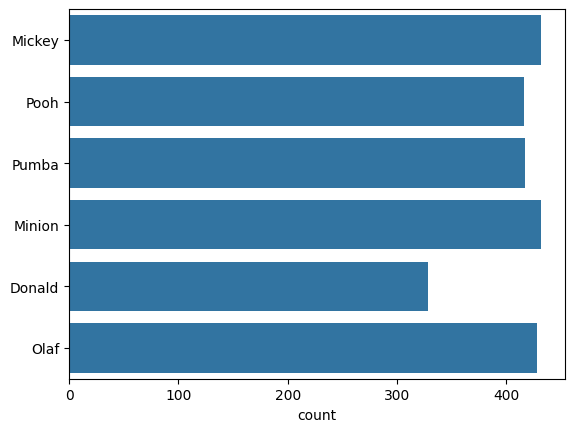

In [6]:
mappings = {0:'Donald',1:'Mickey',2:'Minion',3:'Olaf',4:'Pooh',5:'Pumba'}
Y_data_count = pd.Series(Y_data)
img_count = Y_data_count.map(mappings)
sns.countplot(img_count)

This will output the dimensions of the first item in `X_data`. Here are possible interpretations based on the typical structure of image data:

- If `X_data[0]` is an **image** in RGB format, the output might be `(height, width, 3)`, where `3` represents the RGB color channels.
- If it’s a **grayscale image**, the output might be `(height, width, 1)`, where `1` represents the single grayscale channel.
- For **non-image data**, it could be a single-dimensional array like `(features,)`, indicating the number of features in each sample.

In [ ]:
X_data[0].shape

(224, 224, 3)

The expression `X_data.shape[0]` returns the **number of samples** or data points in `X_data`.

- **For images**: If `X_data` is an array of images, `X_data.shape[0]` gives the total number of images in the dataset.
- **For other data types**: If `X_data` is a multi-dimensional array or matrix, `shape[0]` gives the number of rows (or samples) in the dataset.

This is useful for understanding the size of your dataset, especially when performing operations like splitting data into training and test sets or analyzing dataset dimensions. 

In [8]:
X_data.shape[0]

2453

This reshapes the `X_data` array into a new shape for use in training a neural network, especially a Convolutional Neural Network (CNN) that processes image data. Here's an explanation:

1. **`X_data.shape[0]`**: This represents the number of samples (or images) in your dataset. The first dimension is preserved, meaning the reshaped array will have the same number of samples as `X_data`.

2. **`224, 224`**: These are the new height and width dimensions of the images. It means that the images will be resized to 224 pixels by 224 pixels. This is a common input size for models like ResNet, VGG, and other pre-trained models in deep learning. If the images in `X_data` are not already 224x224, they will need to be resized before this reshape.

3. **`3`**: This represents the number of color channels (i.e., RGB channels) for each image. This means that each pixel in the image will have three values corresponding to Red, Green, and Blue channels.

- **Assumptions**: 
  - The original images in `X_data` should be of the same size or can be resized to 224x224 pixels.
  - The images are in RGB format, meaning they have 3 channels.

This reshaping prepares the data to be fed into a neural network that expects images with specific dimensions (224x224x3).

In [15]:
X_train = X_data.reshape(X_data.shape[0],224,224,3)

1. **`to_categorical(Y_data)`**:
   - `Y_data` is likely a list or array containing integer labels (e.g., `[0, 1, 2, 3, 4, 5]`), which represent different classes (such as 'Donald', 'Mickey', etc.).
   - The `to_categorical` function from Keras converts these integer labels into **one-hot encoded vectors**. This is a common preprocessing step in classification tasks.
   
2. **`num_classes=6`**:
   - The `num_classes=6` argument specifies that there are 6 distinct classes in your dataset. 
   - For each label in `Y_data`, it will be converted into a vector of length 6, where the position corresponding to the class label will have a value of `1`, and all other positions will have a value of `0`.

This transformation is important for categorical classification tasks where the model is expected to predict one class out of a fixed number of categories (in this case, 6).

In [10]:
Y_train = to_categorical(Y_data,num_classes=6)


1. **`Conv2D(50, (2,2), activation='relu', input_shape=(224,224,3))`**:
   - **`Conv2D`**: This is a 2D convolutional layer that performs a convolution operation on the input image.
   - **`50`**: The number of filters (kernels) used for the convolution. Each filter detects different features in the image, such as edges or textures.
   - **`(2,2)`**: The size of the convolutional kernel (filter). In this case, it is a 2x2 filter.
   - **`activation='relu'`**: The activation function used here is Rectified Linear Unit (ReLU), which introduces non-linearity to the model and helps with training.
   - **`input_shape=(224, 224, 3)`**: This specifies the input shape of the images, which are 224x224 pixels with 3 color channels (RGB). This input shape is required for the first layer in a Sequential model.

2. **`MaxPooling2D(2,2)`**:
   - **`MaxPooling2D`**: This is a pooling layer that reduces the spatial dimensions (height and width) of the feature maps. Pooling helps reduce the computational cost and the risk of overfitting.
   - **`(2,2)`**: This indicates a 2x2 pooling window, which means it will take the maximum value in each 2x2 region of the input.

3. **`Conv2D(50, (2,2), activation='relu')`**:
   - This is another convolutional layer with the same number of filters (50) and kernel size (2x2), applying ReLU activation. This layer is used to learn more complex features from the previous layer’s output.

4. **`MaxPooling2D(2,2)`**:
   - Similar to the previous max-pooling layer, this reduces the size of the feature maps by taking the maximum value in each 2x2 region.

5. **`Flatten()`**:
   - The `Flatten` layer converts the 2D matrix output from the previous layer into a 1D vector. This is necessary to connect the convolutional/pooling layers with fully connected (Dense) layers.

6. **`Dense(20, activation='relu')`**:
   - **`Dense`**: This is a fully connected layer. It connects every neuron in the previous layer to every neuron in this layer.
   - **`20`**: The number of neurons in this layer. 
   - **`activation='relu'`**: Again, ReLU is used as the activation function to introduce non-linearity.

7. **`Dense(40, activation='relu')`**:
   - Another fully connected layer with 40 neurons and ReLU activation. This layer helps learn higher-level abstractions of the data.

8. **`Dense(6, activation='softmax')`**:
   - The final `Dense` layer is the output layer.
   - **`6`**: The number of neurons corresponds to the number of classes in the classification problem (6 classes in your case).
   - **`activation='softmax'`**: Softmax is used here because it is a multi-class classification problem. It converts the raw outputs (logits) into probabilities, where the sum of the output values will be 1, and each value represents the likelihood of a class.

In [17]:
cnn = Sequential([Conv2D(50,(2,2),activation='relu',input_shape=(224,224,3)),
                  MaxPooling2D(2,2),
                  Conv2D(50,(2,2),activation='relu',input_shape=(224,224,3)),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(20,activation='relu'),
                  Dense(40,activation='relu'),
                  Dense(6,activation='softmax')])


- **`Optimizer`**: **`Adam`** - An adaptive optimizer that adjusts the learning rate during training for efficient performance.
- **`Loss`**: **`Categorical cross-entropy`** - Used for multi-class classification with one-hot encoded labels.
- **`Metrics`**: **`Accuracy`**, **`precision`**, and **`recall`** - Metrics to track the model's performance:
  - **`Accuracy`**: Overall correctness of the model.
  - **`Precision`**: Measures how many predicted positives are actually positive.
  - **`Recall`**: Measures how many actual positives are correctly predicted.

In [18]:
cnn.compile(optimizer='adam',
            loss="categorical_crossentropy",
            metrics=['accuracy','precision', 'recall'])

- **`cnn.fit()`**: This function is used to train the CNN model on the provided data.
- **`X_train`**: The training data (images), reshaped and preprocessed, which will be fed into the model.
- **`Y_train`**: The one-hot encoded labels corresponding to the images in `X_train`.
- **`epochs=10`**: The model will be trained for 10 epochs, meaning the entire dataset will be passed through the network 10 times during training.

This line starts the training process, adjusting the model's weights over 10 iterations (epochs) based on the training data and labels.

In [27]:
cnn.fit(X_train, Y_train,epochs=10)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8918 - loss: 0.3617 - precision: 0.8962 - recall: 0.8909
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9160 - loss: 0.3251 - precision: 0.9192 - recall: 0.9156
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9036 - loss: 0.3337 - precision: 0.9098 - recall: 0.8990
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9195 - loss: 0.3037 - precision: 0.9254 - recall: 0.9151
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9131 - loss: 0.3022 - precision: 0.9161 - recall: 0.9114
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9289 - loss: 0.2689 - precision: 0.9311 - recall: 0.9265
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9426 - loss: 0.2395 - precision: 0.9474 - recall: 0.9426
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9370 - loss: 0.2376 - precision: 0.9405 - recall: 0.9345
Epoch 9/10
77/77 ━━━━━━━

In [30]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 223, 223, 50)        │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 50)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 110, 110, 50)        │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 55, 55, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 151250)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │       3,025,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 40)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             246 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,110,420 (34.75 MB)

 Trainable params: 3,036,806 (11.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,073,614 (23.17 MB)

1. **`a = X_data[1].reshape(1, 224, 224, 3)`**:
   - This reshapes the second image in `X_data` (i.e., `X_data[1]`) to have the shape `(1, 224, 224, 3)`.
   - The `1` indicates a single image (as the model expects a batch of images, even if it's just one). 
   - The `224x224` is the image size, and `3` refers to the three color channels (RGB).

2. **`prediction = cnn.predict(a)`**:
   - This runs the reshaped image `a` through the trained CNN model to make a prediction. 
   - The output `prediction` will be an array of class probabilities (size 6 in your case, for each class).

3. **`mappings[np.argmax(prediction)]`**:
   - `np.argmax(prediction)` finds the index of the class with the highest probability in the `prediction` array.
   - `mappings[np.argmax(prediction)]` then maps this index to the corresponding class name (e.g., 'Donald', 'Mickey', etc.) using the `mappings` dictionary.

This code reshapes a single image from `X_data`, makes a prediction using the CNN model, and then maps the predicted class index to its corresponding label.

In [28]:
a = X_data[1].reshape(1,224,224,3)
prediction = cnn.predict(a)
mappings[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


'Pooh'

- **`cnn.save('model.keras')`**: This function saves the trained CNN model to a file.
  - **`'model.keras'`**: The file name where the model will be saved. The `.keras` extension is used to save the model in Keras's native format, which includes the architecture, weights, and training configuration.

This line saves the trained model so that it can be reloaded and used later without needing to retrain it.

In [29]:
cnn.save('model.keras')